# EDA Q2: Is there a correlation between square feet living and square feet living for the nearest 15 neighbors?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('added_features_data.csv',index_col=0)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57


In [49]:
sqft_data = data[['sqft_living','sqft_living15']]
sqft_data.head()

,sqft_living,sqft_living15
0,2570,1690
1,2750,1510
2,960,1570
3,1190,1060
4,2500,1580


In [44]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data['sqft_living'], data['sqft_living15'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: 0.7554


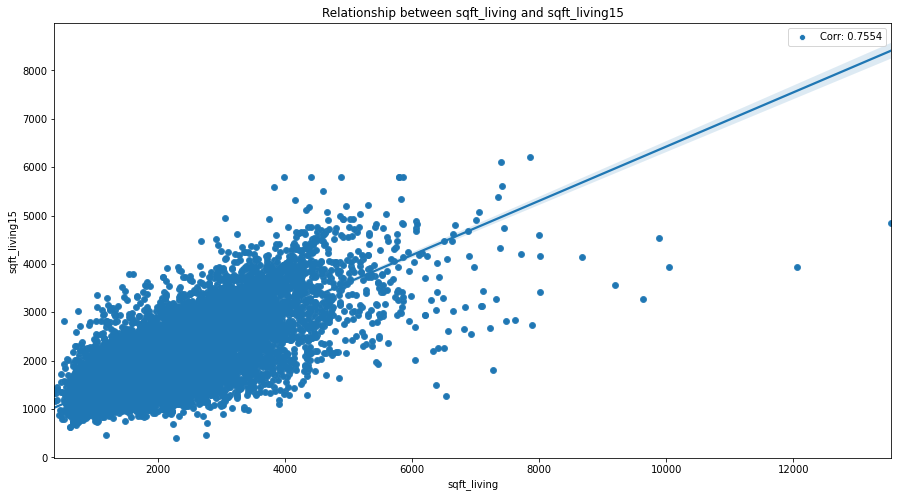

In [47]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="sqft_living", y="sqft_living15", data=data,
                     label=f'Corr: {round(corr,4)}').set_title('Relationship between sqft_living and sqft_living15');
sns.regplot(x="sqft_living", y="sqft_living15",data=data);

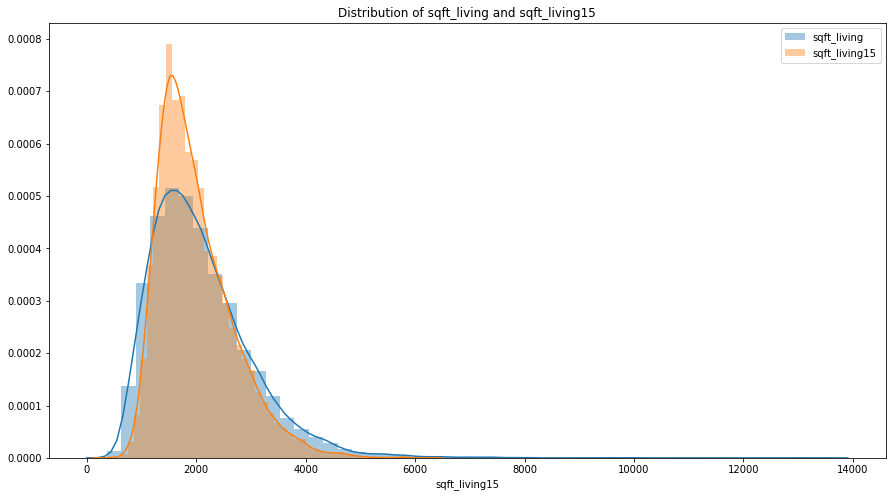

In [46]:
plt.figure(figsize=(15,8))
plt.title('Distribution of sqft_living and sqft_living15')
ax1 = sns.distplot(data['sqft_living'],label='sqft_living');
ax1.legend()
ax2 = sns.distplot(data['sqft_living15'],label='sqft_living15');
ax2.legend();